## Housing Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
housing = pd.read_csv("train.csv")
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [5]:
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [6]:
# Data which is greater than 10%
round(housing.isnull().sum()*100/len(housing.index),2)[round(housing.isnull().sum()*100/len(housing.index),2).values > 20]

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [7]:
# Dropping those column having more than 20% null values 
housing = housing.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis=1)

In [8]:
round(housing.isnull().sum()*100/len(housing.index),2)[round(housing.isnull().sum()/
                                                                 len(housing.index),2).values>0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [9]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

### Convert year into age
Now Convert the year values into ages that makes sense in case of housing

In [10]:
housing['YearBuilt_age'] = housing['YearBuilt'].max()-housing['YearBuilt']
housing[['YearBuilt_age','YearBuilt']].head()

,YearBuilt_age,YearBuilt
0,7,2003
1,34,1976
2,9,2001
3,95,1915
4,10,2000


In [11]:
housing['YearRemodAdd_age'] = housing['YearRemodAdd'].max()-housing.YearRemodAdd
housing[['YearRemodAdd_age','YearRemodAdd']].head()

,YearRemodAdd_age,YearRemodAdd
0,7,2003
1,34,1976
2,8,2002
3,40,1970
4,10,2000


In [12]:
housing['GarageYrBlt_age'] = housing['YearRemodAdd'].max()-housing.GarageYrBlt
housing[['GarageYrBlt_age','GarageYrBlt']].head()

,GarageYrBlt_age,GarageYrBlt
0,7.0,2003.0
1,34.0,1976.0
2,9.0,2001.0
3,12.0,1998.0
4,10.0,2000.0


In [13]:
housing['YrSold_age'] = housing['YrSold'].max()-housing.YrSold
housing[['YrSold_age','YrSold']].head()

,YrSold_age,YrSold
0,2,2008
1,3,2007
2,2,2008
3,4,2006
4,2,2008


In [14]:
# Drop Actual Columns 
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,WD,Normal,250000,10,10,10.0,2
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,700,WD,Normal,143000,17,15,17.0,1
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,WD,Normal,307000,6,5,6.0,3
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,350,WD,Normal,200000,37,37,37.0,1
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,WD,Abnorml,129900,79,60,79.0,2
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,WD,Normal,118000,71,60,71.0,2


### Imputing Missing Values

In [15]:
# columns having null values 
housing.isnull().sum()[housing.isna().sum() > 0 ].sort_values()

Electrical           1
MasVnrType           8
MasVnrArea           8
BsmtQual            37
BsmtCond            37
BsmtFinType1        37
BsmtExposure        38
BsmtFinType2        38
GarageType          81
GarageFinish        81
GarageQual          81
GarageCond          81
GarageYrBlt_age     81
LotFrontage        259
dtype: int64

In [16]:
# Check the value of the Electrical Column
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [17]:
# Replace the value with maximum as it is categorical variable
housing['Electrical'].fillna('SBrkr',inplace=True)
housing['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
# Check the value of the MasVnrType Column
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
# Replace the value with maximum as it is categorical variable
housing['MasVnrType'].fillna('None',inplace=True)
housing['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
# Check the value of the MasVnrType Column
housing['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [21]:
# Replace the value with maximum as it is categorical variable
housing['MasVnrArea'].fillna(0.0,inplace=True)
housing['MasVnrArea'].value_counts()

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [22]:
# Check the value of the BsmtQual  Column
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
# Replace the value with maximum as it is categorical variable
housing['BsmtQual'].fillna('TA',inplace=True)
housing['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [24]:
# Check the value of the BsmtCond Column
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
# Replace the value with maximum as it is categorical variable
housing['BsmtCond'].fillna('TA',inplace=True)
housing['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [26]:
# Check the value of the BsmtFinType1 Column
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [27]:
# Replace the value with maximum as it is categorical variable
housing['BsmtFinType1'].fillna('Unf',inplace=True)
housing['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [28]:
# Check the value of the BsmtExposure Column
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [29]:
# Replace the value with maximum as it is categorical variable
housing['BsmtExposure'].fillna('No',inplace=True)
housing['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [30]:
# Check the value of the BsmtFinType2 Column
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [31]:
# Replace the value with maximum as it is categorical variable
housing['BsmtFinType2'].fillna('Unf',inplace=True)
housing['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [32]:
# Check the value of the GarageType Column
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
# Replace the value with maximum as it is categorical variable
housing['GarageType'].fillna('Attchd',inplace=True)
housing['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [34]:
# Check the value of the GarageFinish Column
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [35]:
# Replace the value with maximum as it is categorical variable
housing['GarageFinish'].fillna('Unf',inplace=True)
housing['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [36]:
# Check the value of the GarageQual Column
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [37]:
# Replace the value with maximum as it is categorical variable
housing['GarageQual'].fillna('TA',inplace=True)
housing['GarageQual'].value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [38]:
# Check the value of the GarageCond Column
housing['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [39]:
# Replace the value with maximum as it is categorical variable
housing['GarageCond'].fillna('TA',inplace=True)
housing['GarageCond'].value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
# Replace the value with -1 as it is age variable
housing['GarageYrBlt_age'].fillna(-1,inplace=True)
housing['GarageYrBlt_age'].value_counts()

-1.0      81
 5.0      65
 4.0      59
 6.0      53
 7.0      50
          ..
 110.0     1
 102.0     1
 83.0      1
 104.0     1
 77.0      1
Name: GarageYrBlt_age, Length: 98, dtype: int64

- As per our analysis Some columns like 'Street' & 'Utilities' shows very variance and nothing impact our analysis so we drop such columns 


In [41]:
housing = housing.drop(['Street','Utilities'],axis='columns')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,WD,Normal,250000,10,10,10.0,2


#### 'Id' and 'LotFrontage' has no relevance and not contributing in analysis so we drop these columns 

In [42]:
housing = housing.drop(['Id','LotFrontage'],axis='columns')
housing.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,WD,Normal,250000,10,10,10.0,2


#### Now Plotting a heatmap to check the Correlation between variables

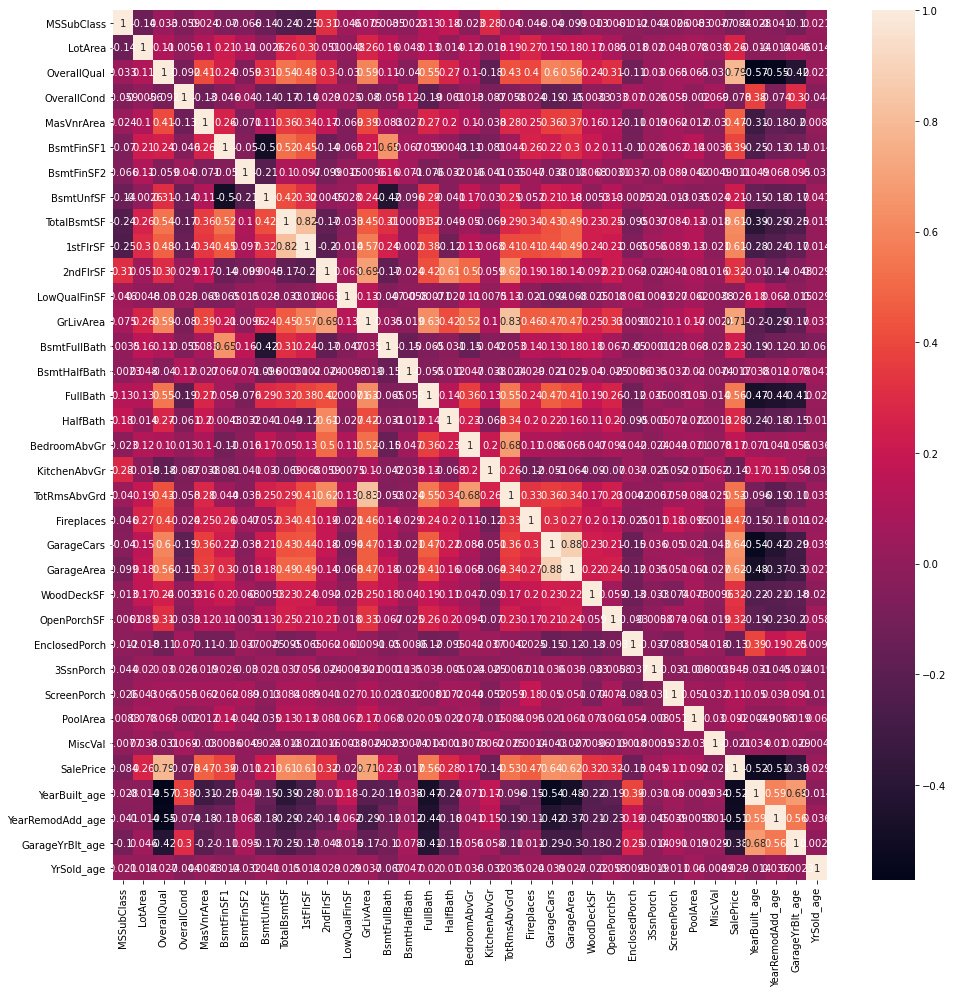

In [43]:
# heatmap 
plt.figure(figsize=(16,16))
sns.heatmap(housing.corr(),annot=True)
plt.show()

#### Let's Plot Some Graph for EDA purpose

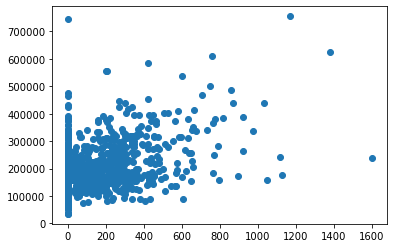

In [44]:
# Scatter Plots of MasVnrArea vs SalePrice
plt.scatter(housing['MasVnrArea'],housing['SalePrice'])
plt.show()

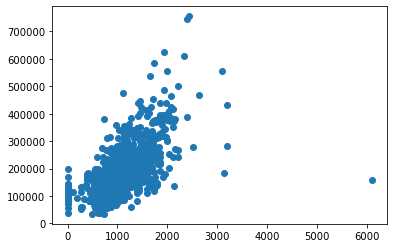

In [45]:
# Scatter Plots of TotalBsmtSF vs SalePrice
plt.scatter(housing['TotalBsmtSF'],housing['SalePrice'])
plt.show()

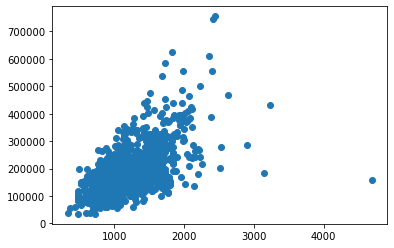

In [46]:
# Scatter Plots of 1stFlrSF vs SalePrice
plt.scatter(housing['1stFlrSF'],housing['SalePrice'])
plt.show()

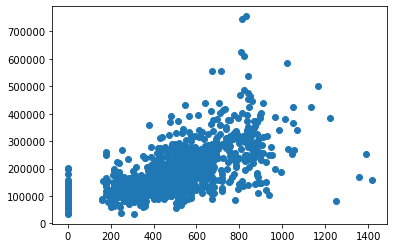

In [47]:
# Scatter Plots of GarageArea vs SalePrice
plt.scatter(housing['GarageArea'],housing['SalePrice'])
plt.show()

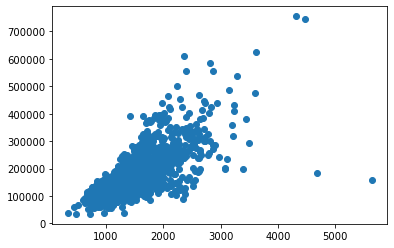

In [48]:
# Scatter Plots of GrLivArea vs SalePrice
plt.scatter(housing['GrLivArea'],housing['SalePrice'])
plt.show()

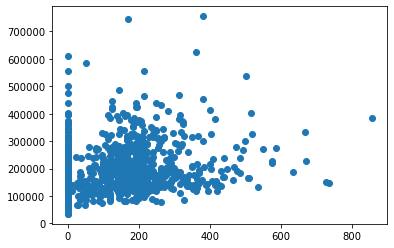

In [49]:
# Scatter Plots of WoodDeckSF vs SalePrice
plt.scatter(housing['WoodDeckSF'],housing['SalePrice'])
plt.show()

In [50]:
# shape of housing
housing.shape

(1460, 71)

#### Now we need to Drop outliers by taking lower quantile(0.25) and Upper Quantile(0.99)

In [51]:
# Outliers Drop method
def drop_outliers(data,num_col):
    list = []
    for col in num_col:
        Q1 = data[col].quantile(.25)
        Q3 = data[col].quantile(.99)
        IQR = Q3-Q1
        data =  data[(data[col] >= (Q1-(1.5*IQR))) & (data[col] <= (Q3+(1.5*IQR)))] 
    return data

In [52]:
# dropping outliers
column = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
        'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
housing = drop_outliers(housing,column)
housing.shape

(1441, 71)

#### There are some variable which are ordinal in nature so we can replace those value with some integer .

In [53]:
# these all variable ordinal in nature
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [54]:
# dictionary for replace of values 
LandSlope_dict = {
    'Gtl':0,
    'Mod':1,
    'Sev':2
}
ExterQual_dict = {
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
BsmtQual_dict = {
    'NA':0,
    'Po':1,
    'Fa':2,
    'TA':3,
    'Gd':4,
    'Ex':5
}
BsmtCond_dict = {
    'NA':0,
    'Po':1,
    'Fa':2,
    'TA':3,
    'Gd':4,
    'Ex':5
}
BsmtExposure_dict = {
    'NA':0,
    'No':1,
    'Mn':2,
    'Av':3,
    'Gd':4
}
BsmtFinType1_dict = {
    'NA':0,
    'Unf':1,
    'LwQ':2,
    'Rec':3,
    'BLQ':4,
    'ALQ':5,
    'GLQ':6
}
BsmtFinType2_dict = {
    'NA':0,
    'Unf':1,
    'LwQ':2,
    'Rec':3,
    'BLQ':4,
    'ALQ':5,
    'GLQ':6
}
HeatingQC_dict = {
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
CentralAir_dict = {
    'N':0,
    'Y':1
}
KitchenQual_dict = {
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
GarageFinish_dict = {
    'NA':0,
    'Unf':1,
    'RFn':2,
    'Fin':3
}
GarageQual_dict = {
    'NA':0,
    'Po':1,
    'Fa':2,
    'TA':3,
    'Gd':4,
    'Ex':5
}
GarageCond_dict = {
    'NA':0,
    'Po':1,
    'Fa':2,
    'TA':3,
    'Gd':4,
    'Ex':5
}
ExterCond_dict = {
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
}
LotShape_dict = {
    'IR1':0,
    'IR2':1,
    'IR3':2,
    'Reg':3
}

In [55]:
# Replace it with values mentioned in dictionaries 
housing['LandSlope'] = housing.LandSlope.map(LandSlope_dict)
housing['ExterQual'] = housing.ExterQual.map(ExterQual_dict)
housing['BsmtQual'] = housing.BsmtQual.map(BsmtQual_dict)
housing['BsmtCond'] = housing.BsmtCond.map(BsmtCond_dict)
housing['BsmtExposure'] = housing.BsmtExposure.map(BsmtExposure_dict)
housing['BsmtFinType1'] = housing.BsmtFinType1.map(BsmtFinType1_dict)
housing['BsmtFinType2'] = housing.BsmtFinType2.map(BsmtFinType2_dict)
housing['HeatingQC'] = housing.HeatingQC.map(HeatingQC_dict)
housing['CentralAir'] = housing.CentralAir.map(CentralAir_dict)
housing['KitchenQual'] = housing.KitchenQual.map(KitchenQual_dict)
housing['GarageFinish'] = housing.GarageFinish.map(GarageFinish_dict)
housing['GarageQual'] = housing.GarageQual.map(GarageQual_dict)
housing['GarageCond'] = housing.GarageCond.map(GarageCond_dict)
housing['ExterCond'] = housing.ExterCond.map(ExterCond_dict)
housing['LotShape'] = housing.LotShape.map(LotShape_dict)

In [56]:
# Converted Colums 

housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Creating a Dummy Column with actual data

In [57]:
# Creating a dummy data
columns = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummy_columns = pd.get_dummies(housing[columns],drop_first = True)

dummy_columns.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
housing = pd.concat([housing,dummy_columns],axis='columns')
housing.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,0,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,0,Lvl,Corner,0,Crawfor,Norm,Norm,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,0,Lvl,FR2,0,NoRidge,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0


In [59]:
# dropping original Column 

housing = housing.drop(columns,axis='columns')
housing.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,0,8,5,350.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0


#### the distribution of our target variable before scaling and Splitting

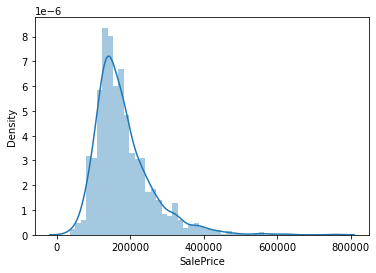

In [60]:
# plotting a distplot
sns.distplot(housing.SalePrice)
plt.show()

#### Train test Split 

In [61]:
df_train,df_test = train_test_split(housing,train_size = 0.7,test_size = 0.3, random_state = 100)
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
106,30,10800,3,0,4,7,0.0,2,2,2,...,0,0,0,0,1,0,0,0,1,0
1305,20,13173,0,0,9,5,300.0,3,2,5,...,0,0,0,0,1,0,0,0,1,0
756,60,10769,0,0,8,5,0.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
826,45,6130,3,0,5,6,0.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0
426,80,12800,3,1,7,5,145.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0


In [62]:
df_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
218,50,15660,0,0,7,9,312.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
30,70,8500,3,0,4,4,0.0,2,1,3,...,0,0,0,0,1,0,0,0,1,0
548,20,8235,0,0,5,7,0.0,2,3,3,...,0,0,0,0,1,0,0,0,1,0
634,90,6979,3,0,6,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0
1362,50,12513,0,0,4,4,0.0,2,3,3,...,0,0,0,0,1,0,0,0,1,0


#### Scaling of Training dataset of housing

In [63]:
columns = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[columns] = scaler.fit_transform(df_train[columns])
df_test[columns] = scaler.transform(df_test[columns])

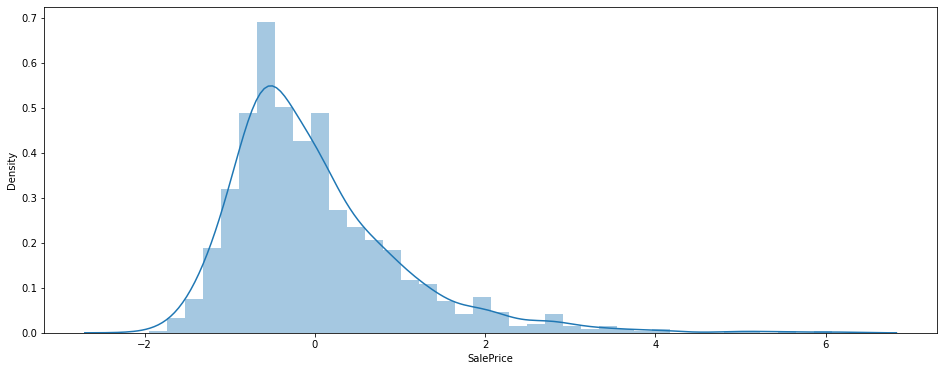

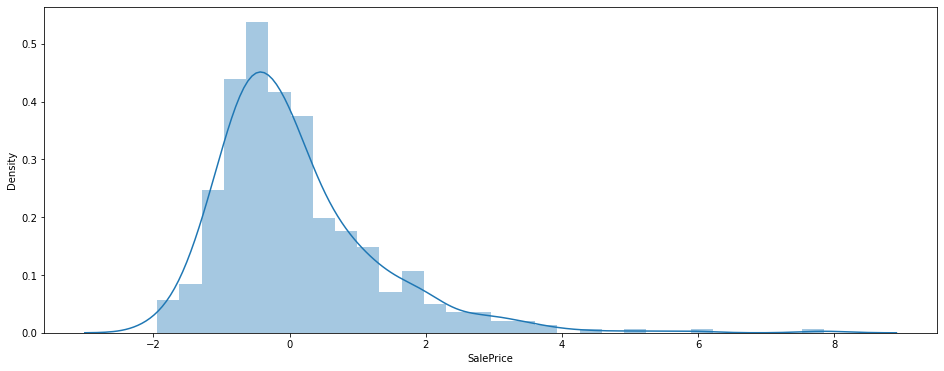

In [64]:
# plotting the distplot of train and test of saleprice
plt.figure(figsize=(16,6))
sns.distplot(df_train['SalePrice'])
plt.show()
plt.figure(figsize=(16,6))
sns.distplot(df_test['SalePrice'])
plt.show()

#### Spliting of Dependent and independent variables 

In [65]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now Let's Try to find out the Optimal modal using RFE

In [66]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

In [67]:
lm_model = LinearRegression()
lm_model.fit(X_train,y_train)
rfe = RFE(lm_model,70)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [68]:
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,30
1,LotArea,True,1
2,LotShape,False,88
3,LandSlope,False,53
4,OverallQual,True,1
...,...,...,...
187,SaleCondition_AdjLand,True,1
188,SaleCondition_Alloca,False,90
189,SaleCondition_Family,False,93
190,SaleCondition_Normal,True,1


In [69]:
rfe_sel = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel

['LotArea',
 'OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'GarageQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn'

#### Lets filter the train and test set for the RFE selected columns

In [70]:
X_train = X_train[rfe_sel]
X_test = X_test[rfe_sel]

#### Now Re-train the model again and Check R2 Score 

In [71]:
model_rfe = LinearRegression()
model_rfe.fit(X_train,y_train)

y_train_pred = model_rfe.predict(X_train)
y_test_pred = model_rfe.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.903847288811869
-3058682019436182.0


### Now Try with lasso Regression 

#### Improve the Model using GridSearchCV Method and Find the optimal Value of Alpha

In [72]:
random_folds = KFold(n_splits=10,shuffle=True,random_state=100)

parameter = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_gridcv = GridSearchCV(estimator = model,
                        param_grid=parameter,
                        scoring='r2',
                        cv=random_folds,
                        verbose=1,
                        return_train_score=True
                       )

model_gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [73]:
lasso_result = pd.DataFrame(model_gridcv.cv_results_)
lasso_result['param_alpha'] = lasso_result['param_alpha'].astype('float32')
lasso_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.051001,0.006216,0.005700,0.000902,0.001,{'alpha': 0.001},0.870936,0.778583,0.877249,0.903213,...,0.897507,0.895623,0.897178,0.897857,0.894879,0.898167,0.900231,0.896625,0.897865,0.001983
1,0.015702,0.003226,0.005493,0.000503,0.010,{'alpha': 0.01},0.865904,0.735819,0.848941,0.867930,...,0.862110,0.858329,0.860054,0.863718,0.858810,0.858994,0.863038,0.856030,0.860854,0.002995
2,0.009899,0.001641,0.005500,0.001027,0.100,{'alpha': 0.1},0.803129,0.725890,0.848358,0.785013,...,0.796014,0.796290,0.795939,0.803131,0.791988,0.797933,0.796027,0.793687,0.797862,0.004282
3,0.008200,0.000748,0.004799,0.000400,1.000,{'alpha': 1.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.010100,0.002510,0.005599,0.002010,5.000,{'alpha': 5.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


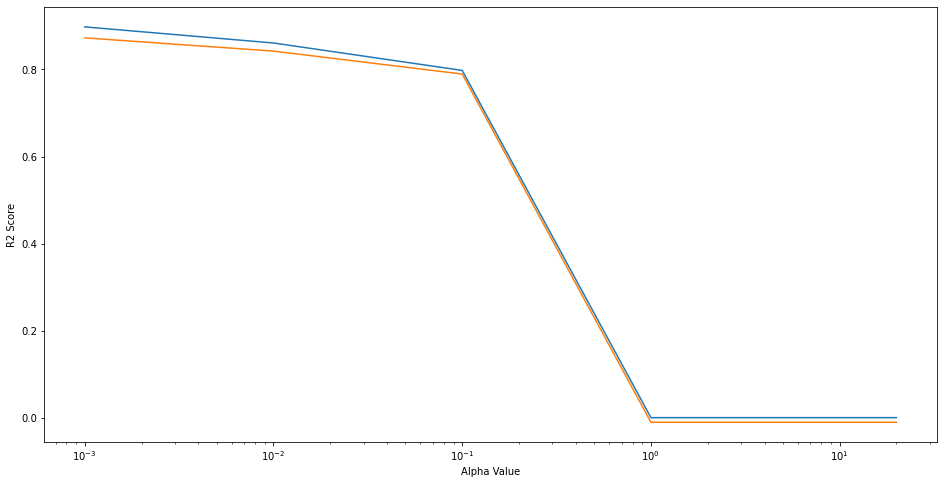

In [74]:
plt.figure(figsize=(16,8))
plt.plot(lasso_result['param_alpha'],lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'],lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha Value')
plt.show()

In [75]:
# Checking the best parameter 
model_gridcv.best_params_

{'alpha': 0.001}

In [76]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8968661923097042
0.8278002685704458


In [77]:
model_param = list(lasso_model.coef_)
model_param.insert(0,lasso_model.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
23,Neighborhood_Somerst,0.436266
67,SaleCondition_AdjLand,0.422363
25,Neighborhood_Veenker,0.393383
22,Neighborhood_NridgHt,0.378369
10,KitchenQual,0.361961
64,SaleType_Con,0.279783
63,GarageType_BuiltIn,0.279741
24,Neighborhood_StoneBr,0.262719
2,BsmtFinSF1,0.257408
55,Foundation_Wood,0.245990


### Now Try with Ridge Regression

#### Improve the Model using GridSearchCV Method and Find the optimal Value of Alpha

In [78]:
random_folds  = KFold(n_splits=10,shuffle=True,random_state=100)

parameter = {'alpha':[0.001,0.01,0.1,1.0,1.5,2.0,2.5,2.7,3.0,3.5,5.0,10.0,20.0]}

model = Ridge()

model_girdcv = GridSearchCV(estimator=model,
                        param_grid=parameter,
                        scoring='r2',
                        cv=random_folds,
                        verbose=1,
                        return_train_score=True)

model_girdcv.fit(X_train,y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 2.5, 2.7,
                                   3.0, 3.5, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [79]:
ridge_result = pd.DataFrame(model_girdcv.cv_results_)
ridge_result['param_alpha'] = ridge_result['param_alpha'].astype('float32')
ridge_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009400,0.001499,0.005198,0.000600,0.001,{'alpha': 0.001},0.864064,0.795570,0.871646,0.904661,...,0.904394,0.902307,0.903329,0.905295,0.902331,0.906399,0.907602,0.904229,0.904937,0.001892
1,0.007701,0.000782,0.015000,0.030010,0.010,{'alpha': 0.01},0.864130,0.795558,0.871687,0.904706,...,0.904393,0.902306,0.903328,0.905294,0.902330,0.906398,0.907601,0.904228,0.904936,0.001892
2,0.009701,0.002282,0.005697,0.001552,0.100,{'alpha': 0.1},0.864738,0.795364,0.872095,0.905067,...,0.904334,0.902249,0.903278,0.905220,0.902264,0.906287,0.907531,0.904156,0.904869,0.001886
3,0.010297,0.001994,0.005499,0.001364,1.000,{'alpha': 1.0},0.868930,0.792656,0.874796,0.906179,...,0.902780,0.900796,0.902050,0.903365,0.900801,0.904211,0.905903,0.902495,0.903279,0.001814
4,0.008200,0.000600,0.004800,0.000400,1.500,{'alpha': 1.5},0.870623,0.791603,0.875562,0.906282,...,0.901998,0.900063,0.901422,0.902490,0.900107,0.903332,0.905104,0.901685,0.902513,0.001798


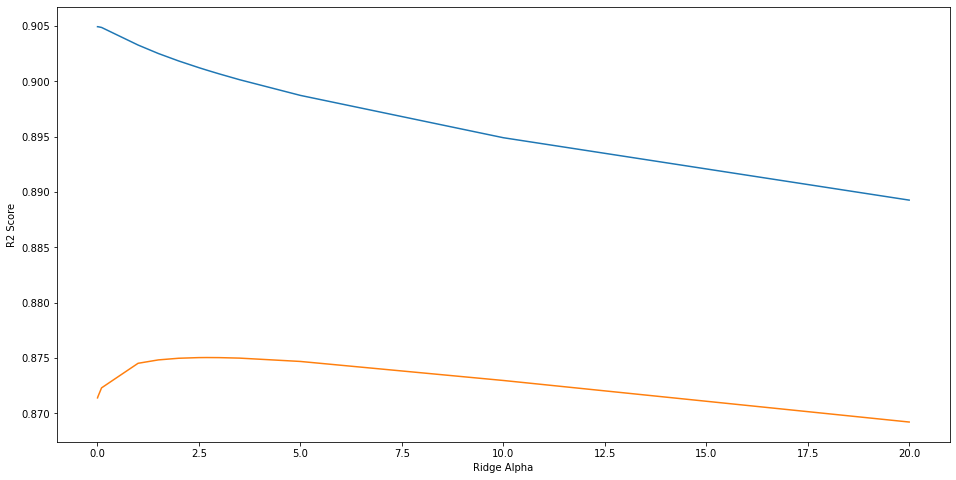

In [80]:
plt.figure(figsize=(16,8))
plt.plot(ridge_result['param_alpha'],ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'],ridge_result['mean_test_score'])
plt.xlabel('Ridge Alpha')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph let's Create the model 

In [81]:
# Checking the best parameter(Alpha value)
model_girdcv.best_params_

{'alpha': 2.7}

In [82]:
model_ridge = Ridge(alpha = 2.7)
model_ridge.fit(X_train,y_train)

y_pred_train = model_ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = model_ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.900301283139331
0.8272501478181521


In [83]:
model_parameter = list(model_ridge.coef_)
model_parameter.insert(0,model_ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(15)

,Feaure,Coef
23,Neighborhood_Somerst,0.436079
25,Neighborhood_Veenker,0.378733
22,Neighborhood_NridgHt,0.374150
67,SaleCondition_AdjLand,0.368642
63,GarageType_BuiltIn,0.281370
64,SaleType_Con,0.280296
55,Foundation_Wood,0.277211
24,Neighborhood_StoneBr,0.256162
2,BsmtFinSF1,0.249885
26,Condition1_Norm,0.245835


### After Creating model Using both Ridge and Lasso we can see r2_score of both model are almost equal. In Lasso we will penalize more on dataset and it is also help in feature elemination so from my point of view it is better.

#### Final Models is as Follows :- 

In [84]:
# Best Alpha value in case of Lasso is 0.001
lasso_final = Lasso(alpha=0.001)
lasso_final.fit(X_train,y_train)

y_train_pred = lasso_final.predict(X_train)
y_test_pred = lasso_final.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8968661923097042
0.8278002685704458


In [85]:
# Best Alpha value in case of Ridge is 2.7
ridge_final = Ridge(alpha=2.7)
ridge_final.fit(X_train,y_train)

y_train_pred = ridge_final.predict(X_train)
y_test_pred = ridge_final.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.900301283139331
0.8272501478181521


In [86]:
# Best Alpha value is doubled in case of Lasso is 0.001
lasso_final = Lasso(alpha=0.001*2)
lasso_final.fit(X_train,y_train)

y_train_pred = lasso_final.predict(X_train)
y_test_pred = lasso_final.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8917219191939744
0.8287003725920321


In [87]:
# Best Alpha value is doubled in case of Ridge is 2.7
ridge_final = Ridge(alpha=2.7*2)
ridge_final.fit(X_train,y_train)

y_train_pred = ridge_final.predict(X_train)
y_test_pred = ridge_final.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8979059052200421
0.8275362996122846


#### Top 5 features From Lasso Regression 
- Neighborhood_Somerst	
- SaleCondition_AdjLand
- Neighborhood_Veenker
- Neighborhood_NridgHt
- KitchenQual

#### Top 5 features From Ridge Regression 
- Neighborhood_Somerst	
- Neighborhood_Veenker
- Neighborhood_NridgHt
- SaleCondition_AdjLand	
- GarageType_BuiltIn	

## Assignment Question Section 

In [88]:
# Now Drop the Top 5 Features for the Lasso Regression and Find the next top 5 features by Rebuilding the Model
X_train = X_train.drop(['Neighborhood_Somerst','SaleCondition_AdjLand','Neighborhood_Veenker','Neighborhood_NridgHt','KitchenQual'],axis='columns')
X_test = X_test.drop(['Neighborhood_Somerst','SaleCondition_AdjLand','Neighborhood_Veenker','Neighborhood_NridgHt','KitchenQual'],axis='columns')

In [89]:
random_folds = KFold(n_splits=10,shuffle=True,random_state=100)

parameter = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_gridcv = GridSearchCV(estimator = model,
                        param_grid=parameter,
                        scoring='r2',
                        cv=random_folds,
                        verbose=1,
                        return_train_score=True
                       )

model_gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [90]:
lasso_result = pd.DataFrame(model_gridcv.cv_results_)
lasso_result['param_alpha'] = lasso_result['param_alpha'].astype('float32')
lasso_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.047196,0.005396,0.005502,9.225465e-04,0.001,{'alpha': 0.001},0.853006,0.752147,0.859410,0.880917,...,0.881472,0.880127,0.881034,0.883962,0.880138,0.882110,0.881082,0.881027,0.881940,0.001755
1,0.014000,0.003163,0.005700,7.843168e-04,0.010,{'alpha': 0.01},0.850072,0.721085,0.838409,0.846129,...,0.849475,0.846898,0.846745,0.853095,0.847794,0.847121,0.847481,0.843657,0.848449,0.002984
2,0.008500,0.000672,0.004999,7.703540e-07,0.100,{'alpha': 0.1},0.790579,0.712462,0.845625,0.776655,...,0.785362,0.790013,0.786482,0.795902,0.786582,0.792063,0.786399,0.786422,0.790073,0.004392
3,0.008100,0.000301,0.004701,6.439231e-04,1.000,{'alpha': 1.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.010501,0.002618,0.005700,1.345119e-03,5.000,{'alpha': 5.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
model_gridcv.best_params_

{'alpha': 0.001}

In [92]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.880923782450566
0.8033570598118213


In [93]:
model_param = list(lasso_model.coef_)
model_param.insert(0,lasso_model.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
63,SaleCondition_Normal,0.512780
10,GarageQual,0.375217
60,SaleType_Con,0.353313
2,BsmtFinSF1,0.347756
51,Foundation_Wood,0.347066


### Top 5 Feature of Lasso after dropping the Top 5 features 
- SaleCondition_Normal
- GarageQual
- SaleType_Con
- BsmtFinSF1
- Foundation_Wood
